In [4]:
from geopy.geocoders import Nominatim
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path

In [2]:
df = pd.read_csv("Weather_Stations_CA.csv")

In [3]:
df.head()

,STATION ID,LATITUDE,LONGITUDE,ELEV\n (FEET),STATION NAME,OCT,NOV,DEC,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,Annual 2023
0,APU,38.573101,-122.440598,1815,ANGWIN PACIFIC UNION COL,0.0,2.64,12.91,15.30,5.04,15.00,0.60,2.00,0.06,0.00,0.07,0.20,53.82
1,ASM,36.483002,-118.833000,1708,ASH MOUNTAIN,0.0,3.13,8.03,13.66,9.66,20.75,0.38,0.38,0.27,0.00,1.58,0.10,111.76
2,ATW,36.464001,-118.630997,6400,ATWELL CAMP,0.0,4.29,12.47,17.05,3.57,30.69,1.93,2.35,1.75,0.36,2.48,0.30,135.18
3,ABR,37.083000,-119.500000,2090,AUBERRY 2 NW,0.0,3.80,7.50,13.12,7.10,13.29,0.00,0.36,0.01,0.00,0.78,0.10,123.30
4,AUB,38.917000,-121.083000,1292,AUBURN,0.0,4.34,5.48,13.53,3.95,8.06,2.10,1.13,0.01,0.00,0.05,0.31,85.02


In [5]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.LONGITUDE, df.LATITUDE), crs="EPSG:4326"
)

In [6]:
gdf.head

,STATION ID,LATITUDE,LONGITUDE,ELEV\n (FEET),STATION NAME,OCT,NOV,DEC,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,Annual 2023,geometry
0,APU,38.573101,-122.440598,1815,ANGWIN PACIFIC UNION COL,0.0,2.64,12.91,15.30,5.04,15.00,0.60,2.00,0.06,0.00,0.07,0.20,53.82,POINT (-122.44060 38.57310)
1,ASM,36.483002,-118.833000,1708,ASH MOUNTAIN,0.0,3.13,8.03,13.66,9.66,20.75,0.38,0.38,0.27,0.00,1.58,0.10,111.76,POINT (-118.83300 36.48300)
2,ATW,36.464001,-118.630997,6400,ATWELL CAMP,0.0,4.29,12.47,17.05,3.57,30.69,1.93,2.35,1.75,0.36,2.48,0.30,135.18,POINT (-118.63100 36.46400)
3,ABR,37.083000,-119.500000,2090,AUBERRY 2 NW,0.0,3.80,7.50,13.12,7.10,13.29,0.00,0.36,0.01,0.00,0.78,0.10,123.30,POINT (-119.50000 37.08300)
4,AUB,38.917000,-121.083000,1292,AUBURN,0.0,4.34,5.48,13.53,3.95,8.06,2.10,1.13,0.01,0.00,0.05,0.31,85.02,POINT (-121.08300 38.91700)


In [22]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

<Axes: >

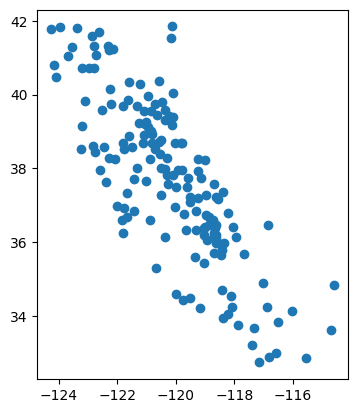

In [23]:
gdf.plot()

In [9]:
from geodata_processing import download_gdf
USA_gdf = download_gdf("USA",1)

In [10]:
california_gdf = USA_gdf[USA_gdf.NAME_1== "California"]

In [25]:
df2 = pd.read_csv("points2.csv")

In [36]:
df2 = df2.loc[df2['have_plant'] == 1]

In [37]:
points_gdf = geopandas.GeoDataFrame(
    df2, geometry=geopandas.points_from_xy(df2.Longitude, df2.Latitude, crs="EPSG:4326")
)

<Axes: >

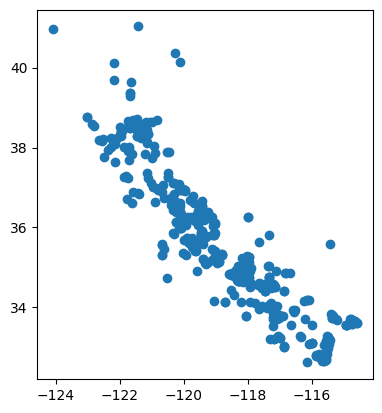

In [38]:
points_gdf.plot()

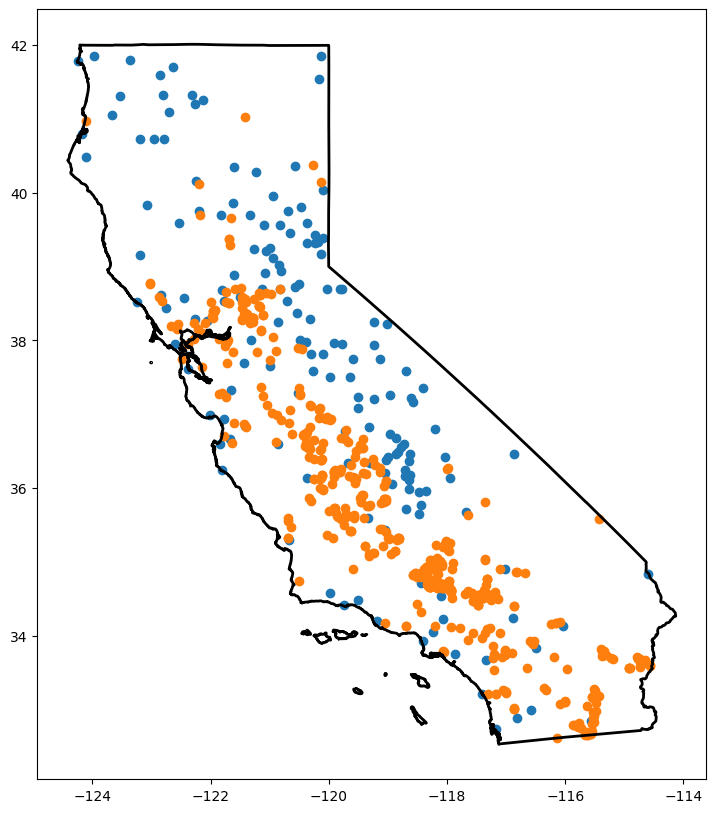

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
california_gdf.boundary.plot(ax=ax, color='black', linewidth=2)
gdf.plot(ax=ax)
points_gdf.plot(ax=ax)
plt.show();

In [40]:
gdf['geometry'] = gdf['geometry'].apply(lambda x: x.wkt)

# Export to CSV
gdf.to_csv('weather_stations_with_precipitation.csv', index=False)

/var/folders/nd/s9p7nt716tl4t0v1q754xm6h0000gn/T/ipykernel_99072/3726228492.py:1: UserWarning: Geometry column does not contain geometry.
  gdf['geometry'] = gdf['geometry'].apply(lambda x: x.wkt)
